
----------------------------------------
  timestep     |  1
  reward       |  -0.192
----------------------------------------
INFO - Agent DQN-Agent, step 132, rl-loss: 0.38883736729621887
----------------------------------------
  timestep     |  131
  reward       |  -0.128
----------------------------------------
INFO - Agent DQN-Agent, step 264, rl-loss: 0.38365113735198975
----------------------------------------
  timestep     |  263
  reward       |  -0.061
----------------------------------------
INFO - Agent DQN-Agent, step 397, rl-loss: 0.5564534068107605
----------------------------------------
  timestep     |  396
  reward       |  -0.049
----------------------------------------
INFO - Agent DQN-Agent, step 540, rl-loss: 0.435441255569458
----------------------------------------
  timestep     |  539
  reward       |  -0.028
----------------------------------------
INFO - Agent DQN-Agent, step 678, rl-loss: 0.4252524673938751
----------------------------------------
  ti

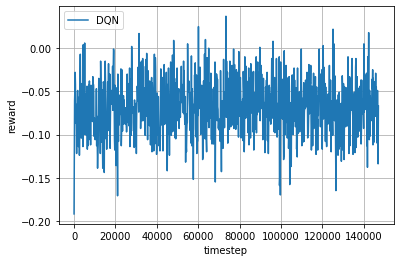

In [7]:


import torch
import os

import rlcard
from rlcard.agents import RandomAgent,DQN_agent,DQN_conf
from rlcard.utils import set_global_seed, tournament
from rlcard.utils import Logger

# Make environment
env = rlcard.make('blackjack', config={'seed': 0})
eval_env = rlcard.make('blackjack', config={'seed': 0})

# Set the iterations numbers and how frequently we evaluate the performance
evaluate_every = 100
evaluate_num = 1000
episode_num = 100000

# The intial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 100

# The paths for saving the logs and learning curves
log_dir = './experiments/blackjack_results_dqn/'

# Set a global seed
set_global_seed(0)

params = {
    "scope":"DQN-Agent",
    "num_actions":env.action_num,
    "replay_memory_size":memory_init_size,
    "num_states":env.state_shape,
    "discount_factor" :0.99,
    "epsilon_start" : 1.0,
    "epsilon_end" : 0.1,
    "epsilon_decay_steps":20000,
    "batch_size":32,
    "train_every":1,
    "mlp_layers":[128,128],
    "lr":0.0005,
}

agent_conf = DQN_conf(**params)
agent = DQN_agent(agent_conf)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

logger = Logger(log_dir)

for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
save_dir = 'models/blackjack_holdem_dqn_pytorch'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
print(state_dict. keys())
torch.save(state_dict, os.path.join(save_dir, 'model.pth'))



In [6]:
# random_eval_env = rlcard.make('blackjack', config={'seed': 0})

# random_agent = RandomAgent(action_num=random_eval_env.action_num)
# random_agent1 = RandomAgent(action_num=random_eval_env.action_num)
# random_eval_env.set_agents([random_agent, random_agent1])

tournament(eval_env, evaluate_num)


[-0.083]

step 8822, rl-loss: 0.6383684277534485
----------------------------------------
  timestep     |  8822
  reward       |  -0.071
----------------------------------------
INFO - Agent double dqn, step 8972, rl-loss: 0.6946665048599243
----------------------------------------
  timestep     |  8972
  reward       |  -0.025
----------------------------------------
INFO - Agent double dqn, step 9000, rl-loss: 0.6681729555130005
INFO - Copied model parameters to target network.
INFO - Agent double dqn, step 9117, rl-loss: 0.4756609797477722
----------------------------------------
  timestep     |  9117
  reward       |  -0.056
----------------------------------------
INFO - Agent double dqn, step 9246, rl-loss: 0.9114235639572144
----------------------------------------
  timestep     |  9246
  reward       |  -0.019
----------------------------------------
INFO - Agent double dqn, step 9383, rl-loss: 0.5044817924499512
----------------------------------------
  timestep     |  9383
  rewar

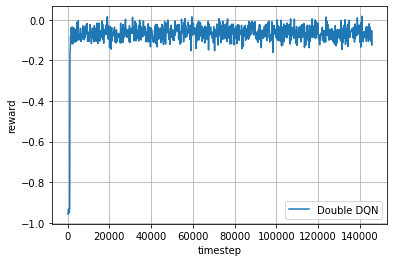

In [12]:
''' An example of learning a Deep-Q Agent on Leduc Holdem
'''
import torch
import os

import rlcard
from rlcard.agents import DQNAgentPytorch as DQNAgent
from rlcard.agents import RandomAgent
from rlcard.utils import set_global_seed, tournament
from rlcard.utils import Logger

# Make environment
env = rlcard.make('blackjack', config={'seed': 0})
eval_env = rlcard.make('blackjack', config={'seed': 0})

# Set the iterations numbers and how frequently we evaluate the performance
evaluate_every = 100
evaluate_num = 1000
episode_num = 100000

# The intial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# The paths for saving the logs and learning curves
log_dir = './experiments/blackjack_double_dqn_result/'

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='double dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[128, 128],
                 device=torch.device('cpu'))
random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('Double DQN')

# Save model
save_dir = 'models/blackjack_double_dqn_pytorch'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
print(state_dict. keys())
torch.save(state_dict, os.path.join(save_dir, 'model.pth'))



In [18]:

from rlcard.agents import DQNAgentPytorch as DQNAgent


# Set 'record_action' to True because we need it to print results
player_num = 2
env = rlcard.make('blackjack', config={'record_action': True, 'game_player_num': player_num})


evaluate_every = 100
evaluate_num = 1000
episode_num = 100000
memory_init_size = 1000
train_every = 1

# Double DQN model
agent_doubledqn = DQNAgent(scope='double dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[128, 128],
                 device=torch.device('cpu'))

DQN_PATH = './models/blackjack_double_dqn_pytorch/model.pth'
agent.load(torch.load(DQN_PATH))
agent.use_raw=True

# DQN model
params = {
    "scope":"DQN-Agent",
    "num_actions":env.action_num,
    "replay_memory_size":memory_init_size,
    "num_states":env.state_shape,
    "discount_factor" :0.99,
    "epsilon_start" : 1.0,
    "epsilon_end" : 0.1,
    "epsilon_decay_steps":20000,
    "batch_size":32,
    "train_every":1,
    "mlp_layers":[128,128],
    "lr":0.00005,
}

agent_conf = DQN_conf(**params)
agent_dqn = DQN_agent(agent_conf)
DQN_PATH = './models/blackjack_holdem_dqn_pytorch/model.pth'
agent_dqn.load(torch.load(DQN_PATH))

[-0.045]

In [24]:
eval_env.run()

([[[{'obs': array([15, 10]), 'legal_actions': [0, 1]},
    0,
    -1,
    {'obs': array([23, 20]), 'legal_actions': [0, 1]},
    True]]],
 array([-1]))

In [5]:

import rlcard
from rlcard.agents import RandomAgent as RandomAgent
from rlcard.utils.utils import print_card
from rlcard.agents import DQNAgentPytorch as DQNAgent
from rlcard.agents import DQN_agent,DQN_conf
import torch



# Make environment and enable human mode
# Set 'record_action' to True because we need it to print results
player_num = 2
env = rlcard.make('blackjack', config={'record_action': True, 'game_player_num': player_num})


evaluate_every = 100
evaluate_num = 1000
episode_num = 100000
memory_init_size = 1000
train_every = 1

# Double DQN model
agent = DQNAgent(scope='double dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[128, 128],
                 device=torch.device('cpu'))

DQN_PATH = './models/blackjack_double_dqn_pytorch/model.pth'
agent.load(torch.load(DQN_PATH))
agent.use_raw=True

# # DQN model
# params = {
#     "scope":"DQN-Agent",
#     "num_actions":env.action_num,
#     "replay_memory_size":memory_init_size,
#     "num_states":env.state_shape,
#     "discount_factor" :0.99,
#     "epsilon_start" : 1.0,
#     "epsilon_end" : 0.1,
#     "epsilon_decay_steps":20000,
#     "batch_size":32,
#     "train_every":1,
#     "mlp_layers":[128,128],
#     "lr":0.00005,
# }

# agent_conf = DQN_conf(**params)
# agent = DQN_agent(agent_conf)
# DQN_PATH = './models/blackjack_holdem_dqn_pytorch/model.pth'
# agent.load(torch.load(DQN_PATH))

# human_agent = HumanAgent(env.action_num)
random_agent = RandomAgent(env.action_num)
random_agent1 = RandomAgent(env.action_num)
# env.set_agents([human_agent, random_agent])
env.set_agents([agent, random_agent])

print(">> Blackjack human agent")

while (True):
    print(">> Start a new game")

    trajectories, payoffs = env.run(is_training=False)
    # If the human does not take the final action, we need to
    # print other players action

    if len(trajectories[0]) != 0:
        final_state = []
        action_record = []
        state = []
        _action_list = []

        for i in range(player_num):
            final_state.append(trajectories[i][-1][-2])
            state.append(final_state[i]['raw_obs'])

        action_record.append(final_state[i]['action_record'])
        for i in range(1, len(action_record) + 1):
            _action_list.insert(0, action_record[-i])

        for pair in _action_list[0]:
            print('>> Player', pair[0], 'chooses', pair[1])

    # Let's take a look at what the agent card is
    print('===============   Dealer hand   ===============')
    print_card(state[0]['state'][1])

    for i in range(player_num):
        print('===============   Player {} Hand   ==============='.format(i))
        print_card(state[i]['state'][0])

    print('===============     Result     ===============')
    for i in range(player_num):
        if payoffs[i] == 1:
            print('Player {} win {} chip!'.format(i, payoffs[i]))
        elif payoffs[i] == 0:
            print('Player {} is tie'.format(i))
        else:
            print('Player {} lose {} chip!'.format(i, -payoffs[i]))
        print('')

    input("Press any key to continue...")


>> Blackjack human agent
>> Start a new game
>> Player 0 chooses 0
>> Player 1 chooses hit
>> Player 0 chooses 1
>> Player 1 chooses stand
===============   Dealer hand   ===============
┌─────────┐   ┌─────────┐   ┌─────────┐   ┌─────────┐
│5        │   │K        │   │A        │   │2        │
│         │   │         │   │         │   │         │
│         │   │         │   │         │   │         │
│    ♠    │   │    ♦    │   │    ♦    │   │    ♠    │
│         │   │         │   │         │   │         │
│         │   │         │   │         │   │         │
│        5│   │        K│   │        A│   │        2│
└─────────┘   └─────────┘   └─────────┘   └─────────┘
===============   Player 0 Hand   ===============
┌─────────┐   ┌─────────┐   ┌─────────┐   ┌─────────┐
│4        │   │5        │   │9        │   │8        │
│         │   │         │   │         │   │         │
│         │   │         │   │         │   │         │
│    ♦    │   │    ♥    │   │    ♥    │   │    ♣    │
│      

KeyboardInterrupt: Interrupted by user

In [12]:
from rlcard.utils import set_global_seed, tournament
tournament(env,10000)

[-1.0, -0.4107]